## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech(negative) if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets(positive).

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is negative and label '0' denotes the tweet is positive , your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

## Import modules

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [62]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [63]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the dataset

In [64]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [65]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [66]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [67]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [68]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [69]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4             [factsguide:, society, now, #motivation]
Name: clean_tweet, dtype: object

In [70]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide:, societi, now, #motiv]
Name: clean_tweet, dtype: object

In [71]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can't use caus they d...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv


## Exploratory Data Analysis

In [72]:
# !pip install wordcloud

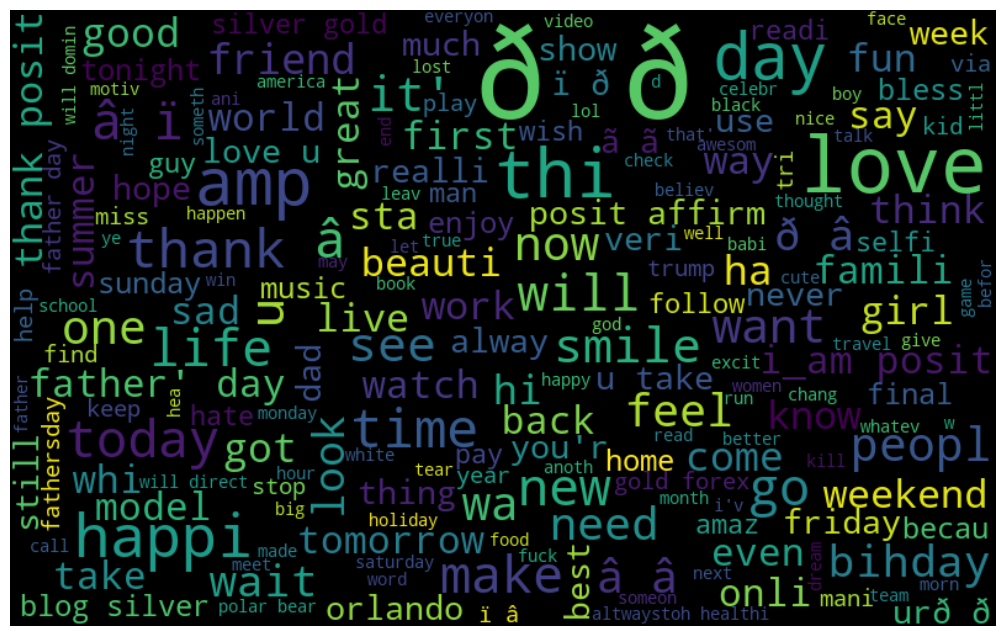

In [73]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

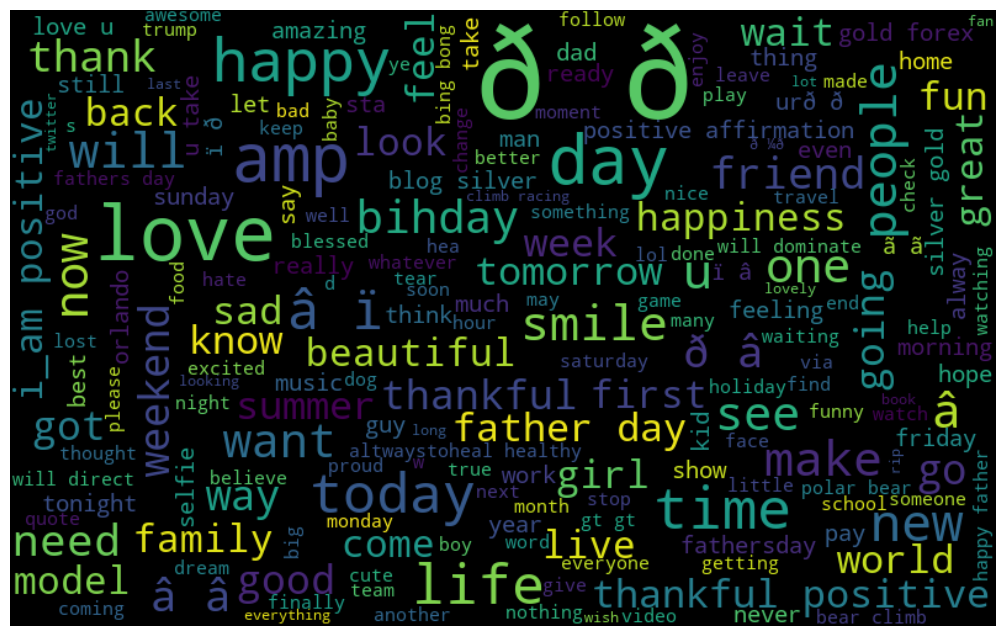

In [13]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

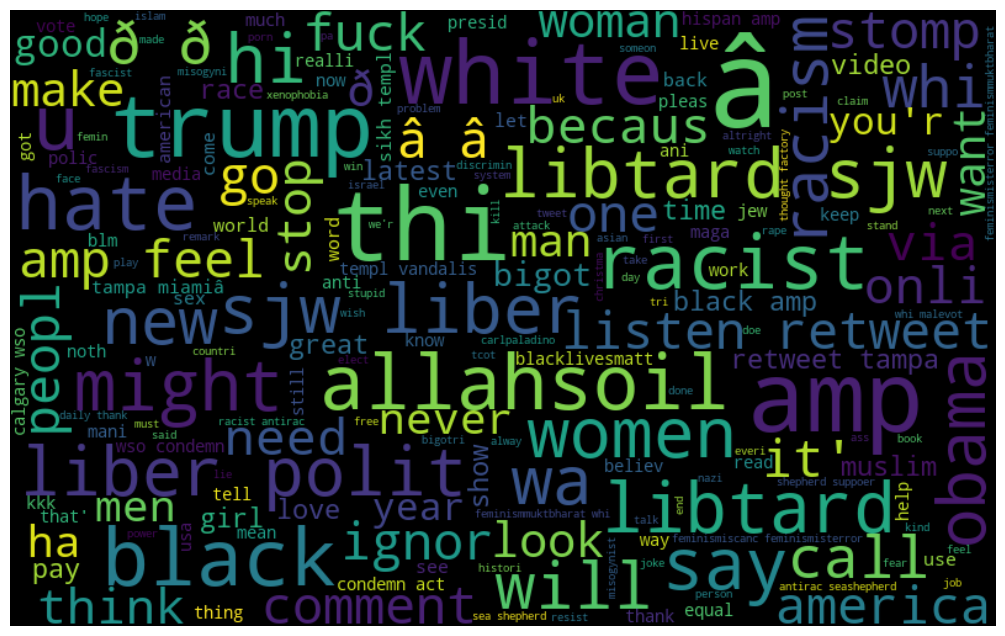

In [74]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [75]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [76]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [77]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [78]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [79]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [80]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


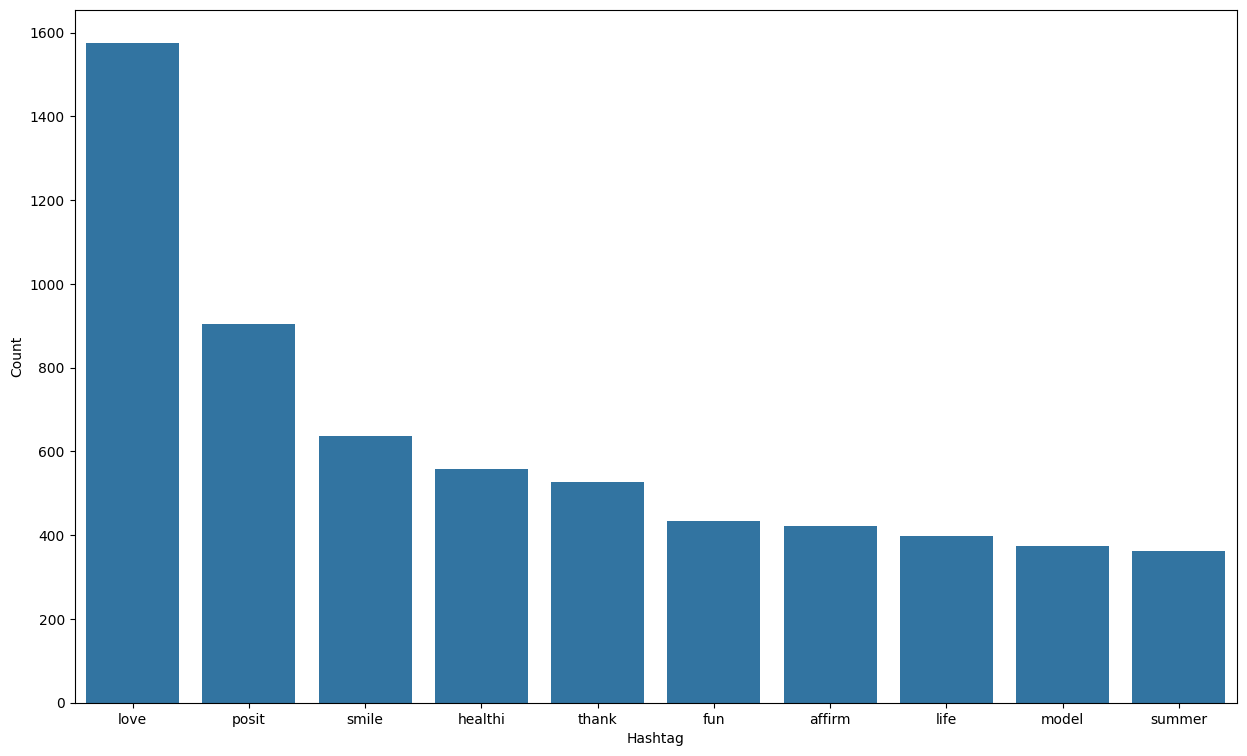

In [81]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [82]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
                 
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


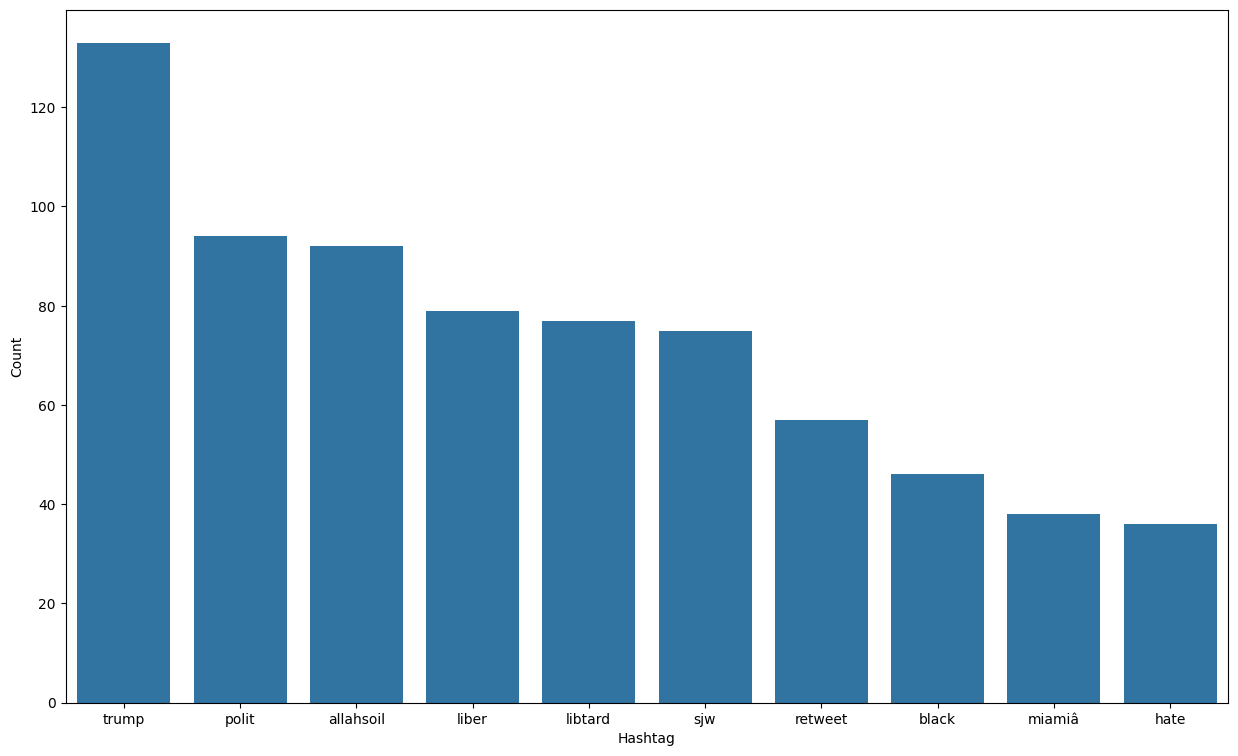

In [83]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [84]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [85]:
# bow[0].toarray()

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## Model Training

# LogisticRegression 

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [88]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [89]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.5257009345794392

In [90]:
accuracy_score(y_test,pred)

0.9491928419471906

In [46]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)  # Corrected line

# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f"F1 Score: {f1}")


F1 Score: 0.5667627281460135


In [91]:
accuracy_score(y_test,pred)

0.9491928419471906

In [92]:
pred_prob[0][1] >= 0.3

False

In [93]:
freq_positive = nltk.FreqDist(ht_positive)
freq_negative = nltk.FreqDist(ht_negative)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(freq_positive.most_common(10), columns=['Hashtag', 'Count'])
negative_df = pd.DataFrame(freq_negative.most_common(10), columns=['Hashtag', 'Count'])


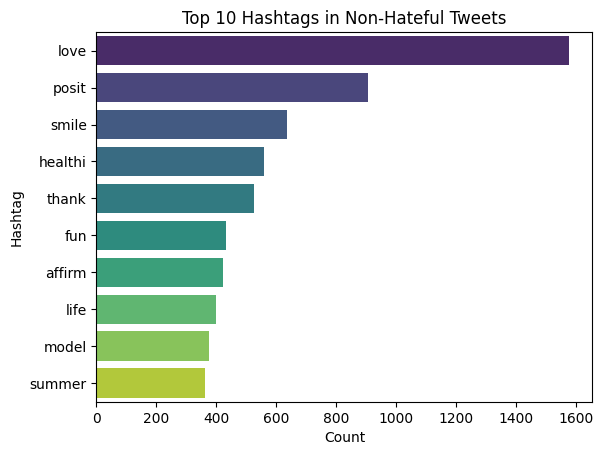

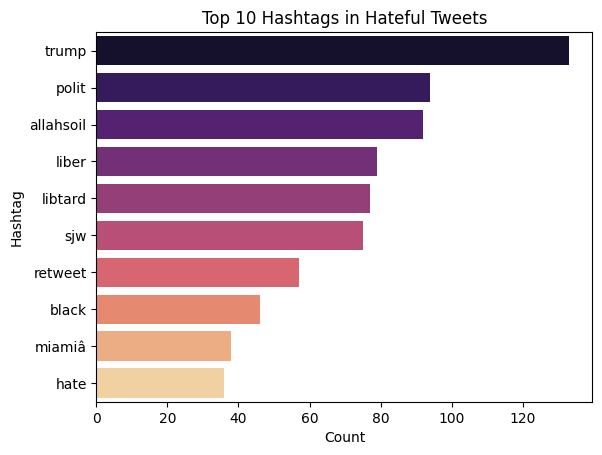

In [94]:
sns.barplot(data=positive_df, x='Count', y='Hashtag', palette='viridis')
plt.title('Top 10 Hashtags in Non-Hateful Tweets')
plt.show()

sns.barplot(data=negative_df, x='Count', y='Hashtag', palette='magma')
plt.title('Top 10 Hashtags in Hateful Tweets')
plt.show()


In [95]:
# Naive Bayes Classifier

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Predictions
nb_pred = nb_model.predict(x_test)

# Evaluate Performance
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("F1 Score:", f1_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Performance:
Accuracy: 0.9340508071580528
F1 Score: 0.5364995602462621
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7432
           1       0.53      0.55      0.54       559

    accuracy                           0.93      7991
   macro avg       0.75      0.75      0.75      7991
weighted avg       0.94      0.93      0.93      7991



# Support Vector Machine (SVM)

In [97]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for text data
svm_model.fit(x_train, y_train)

# Predictions
svm_pred = svm_model.predict(x_test)

# Evaluate Performance
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Performance:
Accuracy: 0.9474408709798523
F1 Score: 0.5035460992907801
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.74      0.38      0.50       559

    accuracy                           0.95      7991
   macro avg       0.85      0.69      0.74      7991
weighted avg       0.94      0.95      0.94      7991



# K-Nearest Neighbors (KNN)

In [98]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
rf_pred = rf_model.predict(x_test)

# Evaluate Performance
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Performance:
Accuracy: 0.9373044675259667
F1 Score: 0.5416285452881976
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7432
           1       0.55      0.53      0.54       559

    accuracy                           0.94      7991
   macro avg       0.76      0.75      0.75      7991
weighted avg       0.94      0.94      0.94      7991



# K-Nearest Neighbors (KNN)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Predictions
knn_pred = knn_model.predict(x_test)

# Evaluate Performance
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Performance:
Accuracy: 0.9376798898761106
F1 Score: 0.4043062200956938
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.61      0.30      0.40       559

    accuracy                           0.94      7991
   macro avg       0.78      0.64      0.69      7991
weighted avg       0.93      0.94      0.93      7991



# Compare Performance of All Models

In [105]:
from sklearn.metrics import precision_score, recall_score

# Compare Performance
performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, pred),       # Logistic Regression
        accuracy_score(y_test, nb_pred),   # Naive Bayes
        accuracy_score(y_test, svm_pred),  # SVM
        accuracy_score(y_test, rf_pred),   # Random Forest
        accuracy_score(y_test, knn_pred)   # KNN
    ],
    "F1 Score": [
        f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, nb_pred, average='weighted'),
        f1_score(y_test, svm_pred, average='weighted'),
        f1_score(y_test, rf_pred, average='weighted'),
        f1_score(y_test, knn_pred, average='weighted')
    ],
    "Precision": [
        precision_score(y_test, pred, average='weighted'),
        precision_score(y_test, nb_pred, average='weighted'),
        precision_score(y_test, svm_pred, average='weighted'),
        precision_score(y_test, rf_pred, average='weighted'),
        precision_score(y_test, knn_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, nb_pred, average='weighted'),
        recall_score(y_test, svm_pred, average='weighted'),
        recall_score(y_test, rf_pred, average='weighted'),
        recall_score(y_test, knn_pred, average='weighted')
    ]
})

# Display performance metrics
print(performance)


                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.949193  0.941857   0.942668  0.949193
1          Naive Bayes  0.934051  0.934560   0.935092  0.934051
2                  SVM  0.947441  0.939464   0.940193  0.947441
3        Random Forest  0.937304  0.936640   0.936020  0.937304
4                  KNN  0.937680  0.927749   0.925705  0.937680


# the performance of all models plot

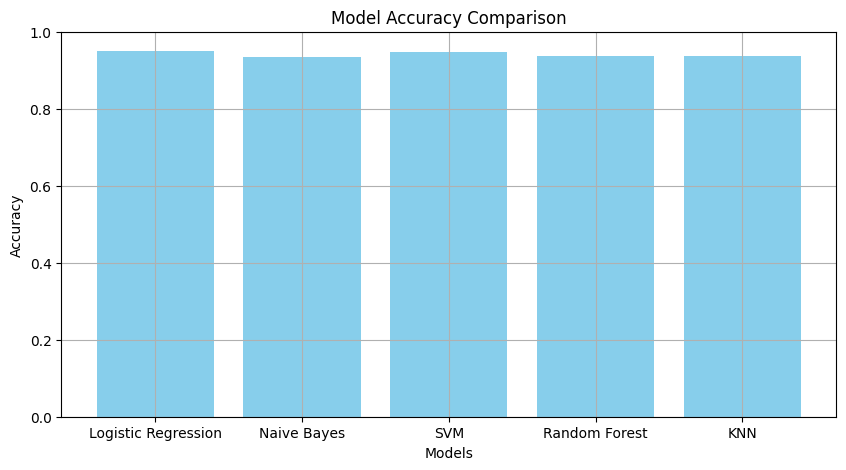

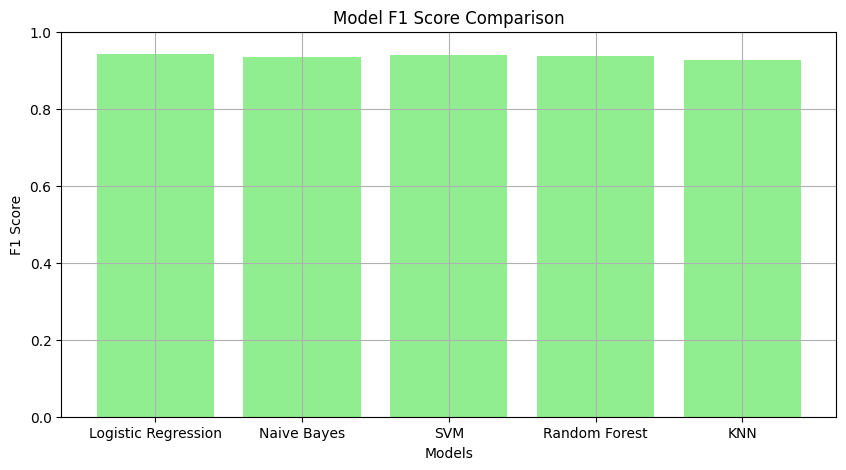

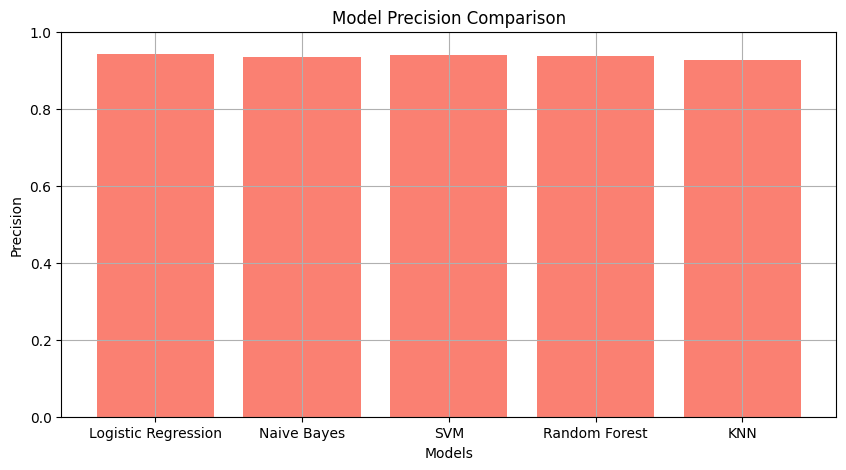

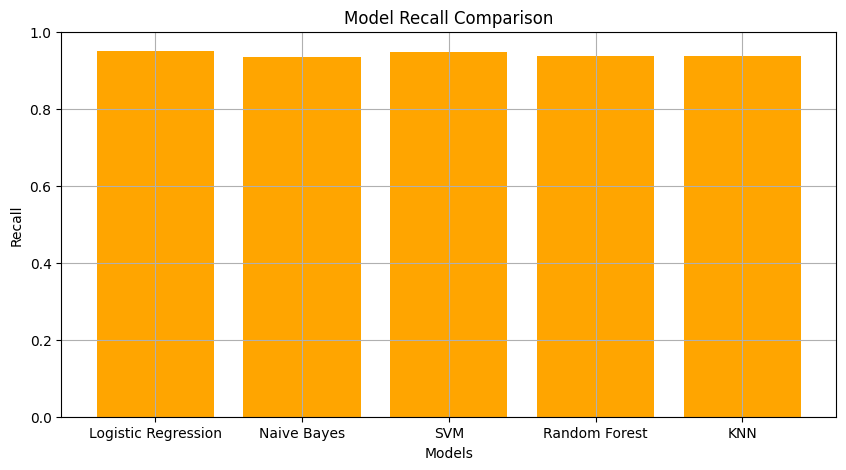

In [106]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.bar(performance['Model'], performance['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.grid(True)
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 5))
plt.bar(performance['Model'], performance['F1 Score'], color='lightgreen')
plt.title('Model F1 Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # F1 Score ranges between 0 and 1
plt.grid(True)
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5))
plt.bar(performance['Model'], performance['Precision'], color='salmon')
plt.title('Model Precision Comparison')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Precision ranges between 0 and 1
plt.grid(True)
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
plt.bar(performance['Model'], performance['Recall'], color='orange')
plt.title('Model Recall Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Recall ranges between 0 and 1
plt.grid(True)
plt.show()
